In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/vsoun/Downloads/Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
data.shape

(545, 12)

In [5]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

# Univariate Analysis

Text(0, 0.5, 'Frequency')

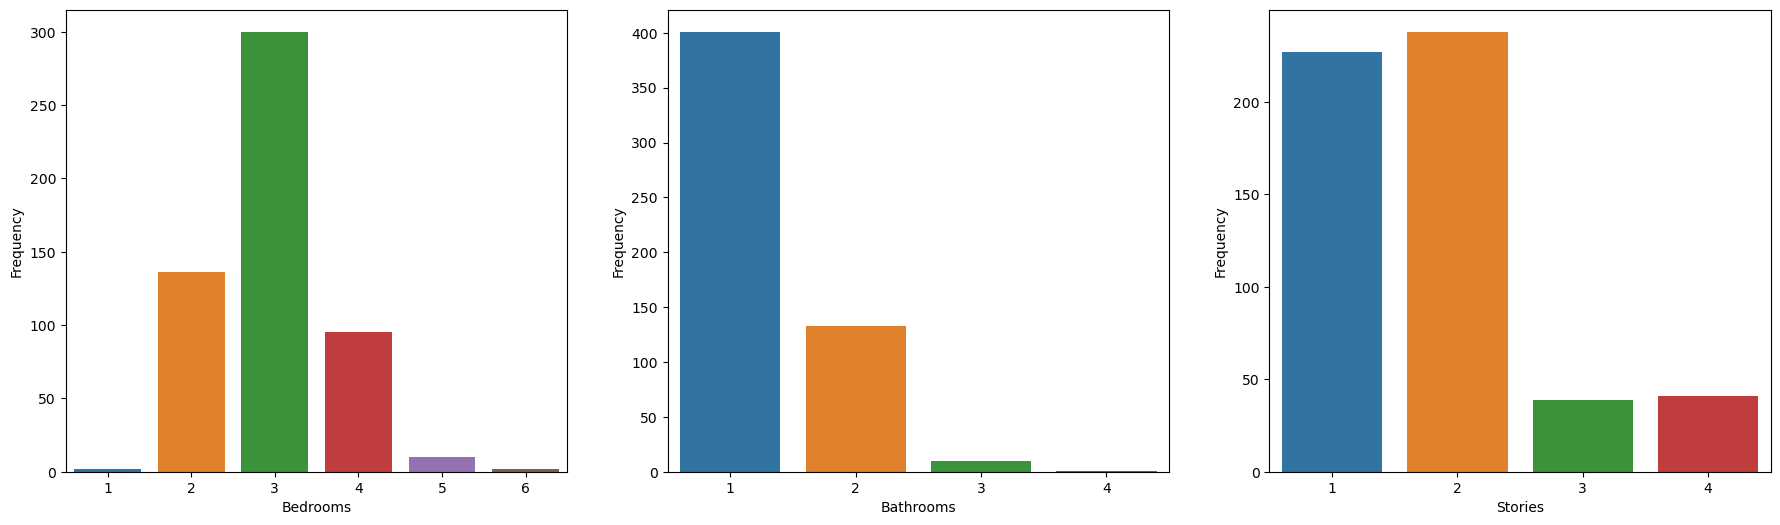

In [7]:
plt.figure(figsize=(22,6))

#bedrooms
plt.subplot(131)
sns.countplot(data['bedrooms'])
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

#bathrooms
plt.subplot(132)
sns.countplot(data['bathrooms'])
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')

#stories
plt.subplot(133)
sns.countplot(data['stories'])
plt.xlabel('Stories')
plt.ylabel('Frequency')

Most houses have 3 bedrooms,
Most houses have 1 bathroom,
Most houses have 2 stories

Text(0, 0.5, 'Frequency')

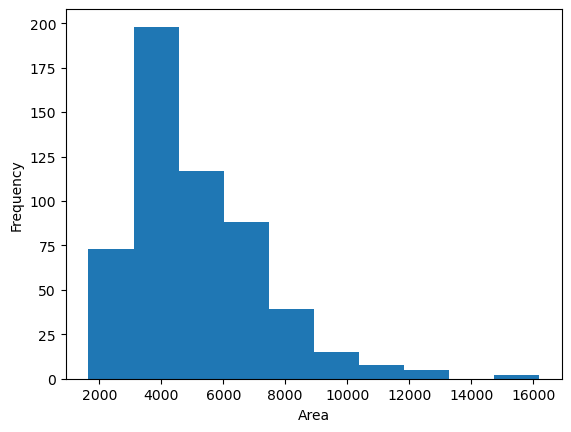

In [9]:
plt.hist(data['area'])
plt.xlabel('Area')
plt.ylabel('Frequency')

(2000.0, 5000.0)

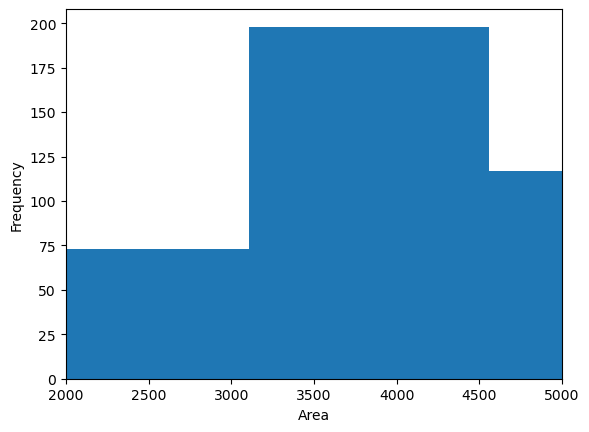

In [12]:
#To exactly find the most frequent area for houses, limiting the range of values in x axis

plt.hist(data['area'])
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.xlim(2000,5000)

Most of the houses have area between 3200 and 4500

In [15]:
print(data['price'].min())
print(data['price'].max())

1750000
13300000


(1750000.0, 13300000.0)

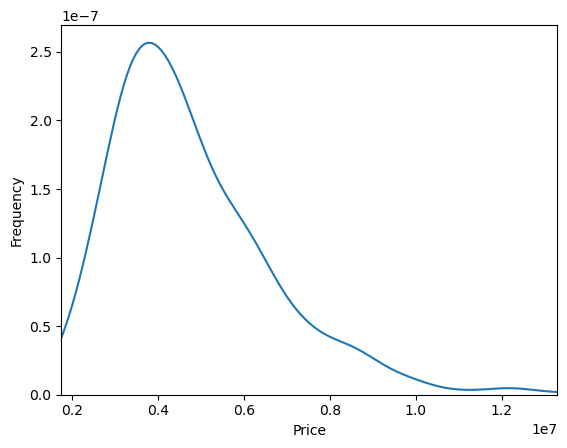

In [17]:
sns.kdeplot(data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(1750000,13300000)

Most houses have the price range between 35 and 45 lakhs

Text(0, 0.5, 'Frequency')

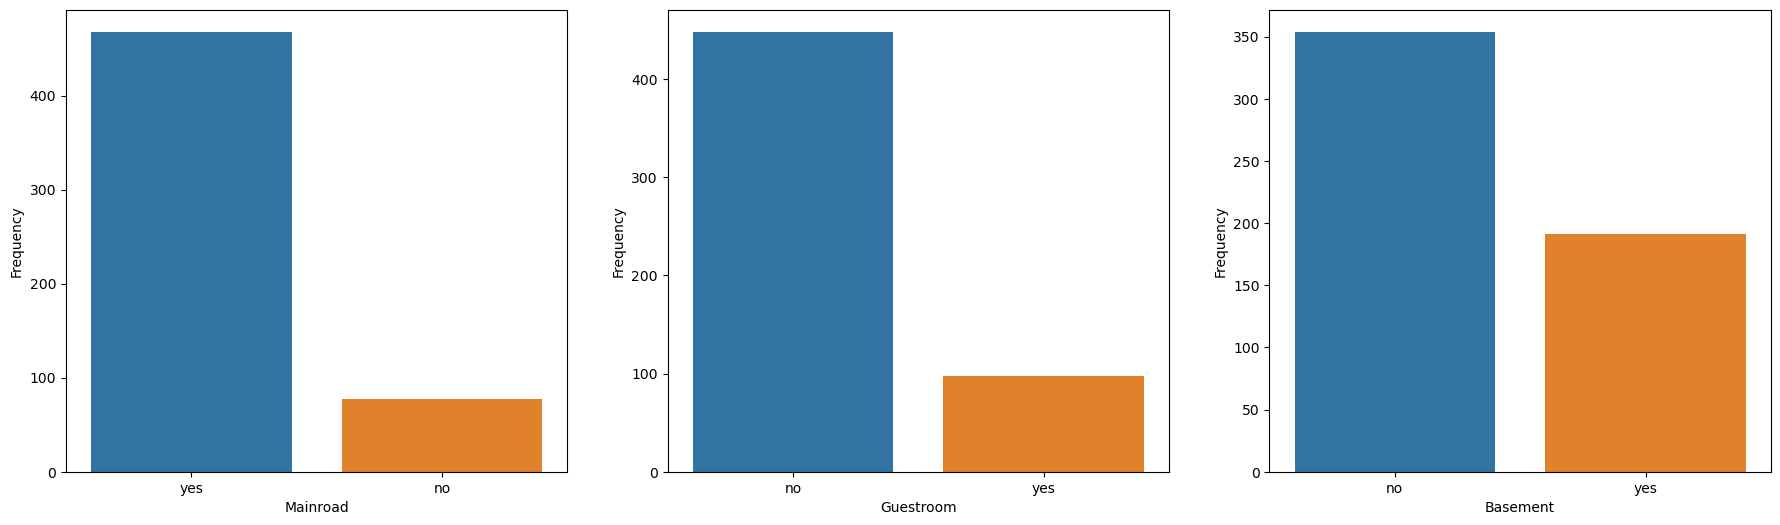

In [19]:
plt.figure(figsize=(22,6))

#bedrooms
plt.subplot(131)
sns.countplot(data['mainroad'])
plt.xlabel('Mainroad')
plt.ylabel('Frequency')

#bathrooms
plt.subplot(132)
sns.countplot(data['guestroom'])
plt.xlabel('Guestroom')
plt.ylabel('Frequency')

#stories
plt.subplot(133)
sns.countplot(data['basement'])
plt.xlabel('Basement')
plt.ylabel('Frequency')

Most houses connect to the mainroad, Most houses doesn't have a guestroom and most houses doesn't have a basement

Text(0, 0.5, 'Frequency')

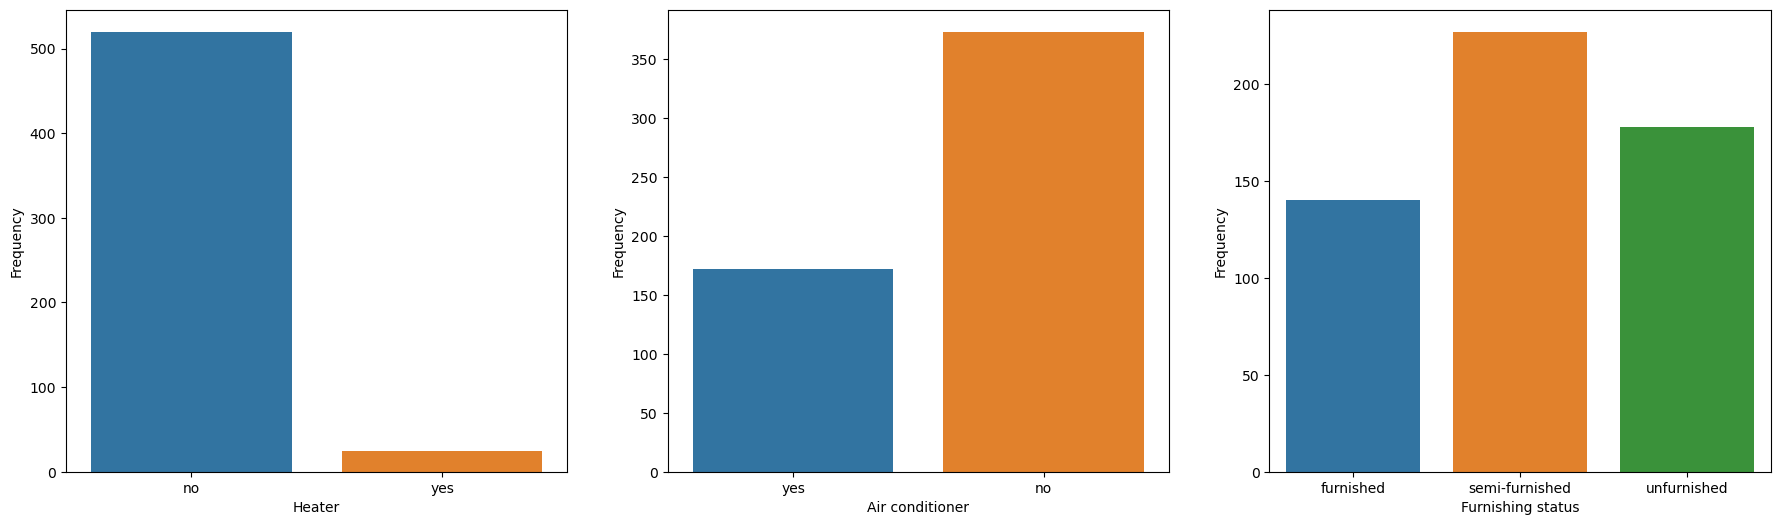

In [21]:
plt.figure(figsize=(22,6))

#bedrooms
plt.subplot(131)
sns.countplot(data['hotwaterheating'])
plt.xlabel('Heater')
plt.ylabel('Frequency')

#bathrooms
plt.subplot(132)
sns.countplot(data['airconditioning'])
plt.xlabel('Air conditioner')
plt.ylabel('Frequency')

#stories
plt.subplot(133)
sns.countplot(data['furnishingstatus'])
plt.xlabel('Furnishing status')
plt.ylabel('Frequency')

Most houses doesn't have a heater, Most houses doesn't have an air conditioner. Most houses are semi-furnished

Text(0, 0.5, 'Frequency')

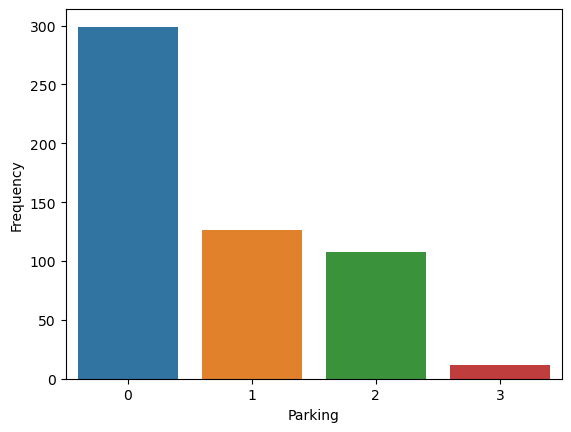

In [23]:
sns.countplot(data['parking'])
plt.xlabel('Parking')
plt.ylabel('Frequency')

Most houses do not have a parking

# Bivariate Analysis

In [24]:
def BVA(data,var1,var2,var3):
    plt.subplot(131)
    sns.barplot(data=data,x=var1,y='price')
    plt.subplot(132)
    sns.barplot(data=data,x=var2,y='price')
    plt.subplot(133)
    sns.barplot(data=data,x=var3,y='price')

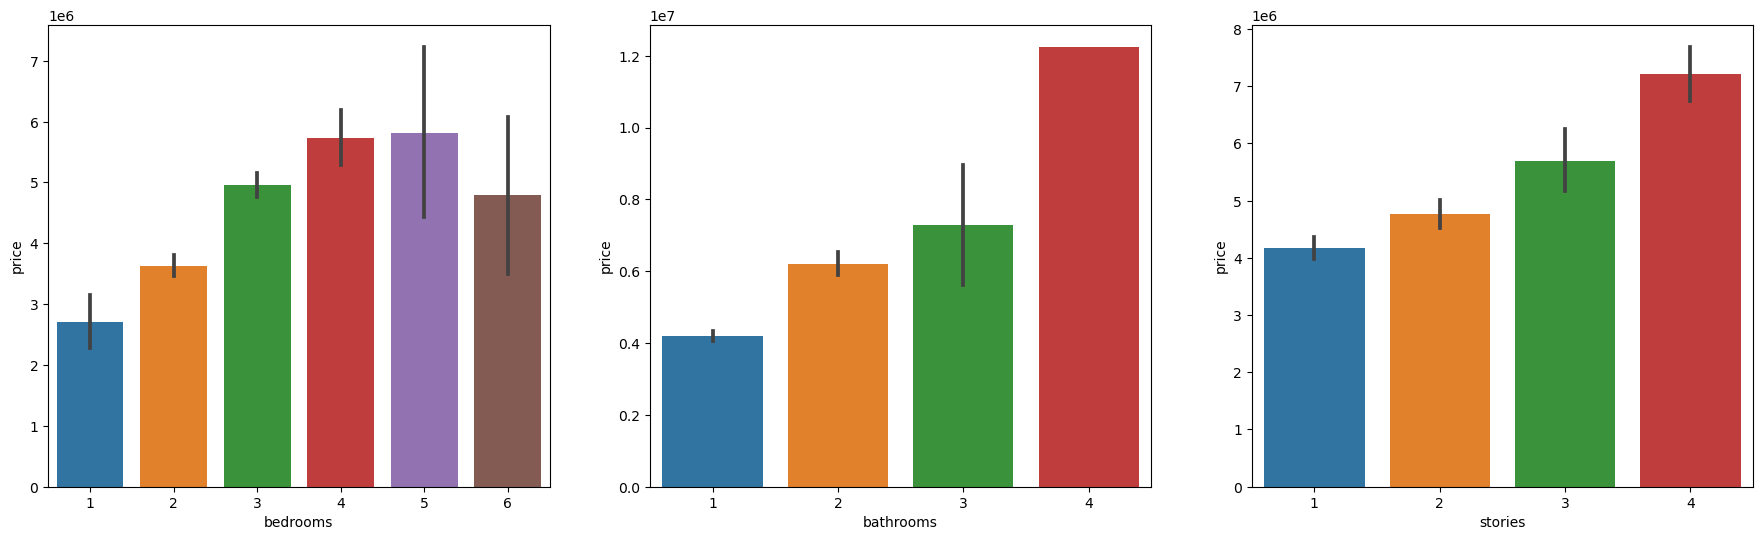

In [26]:
plt.figure(figsize=(22,6))
BVA(data,'bedrooms','bathrooms','stories')

Price is high for houses with 4 or 5 bedrooms, Price increases with number of bathrooms and number of stories

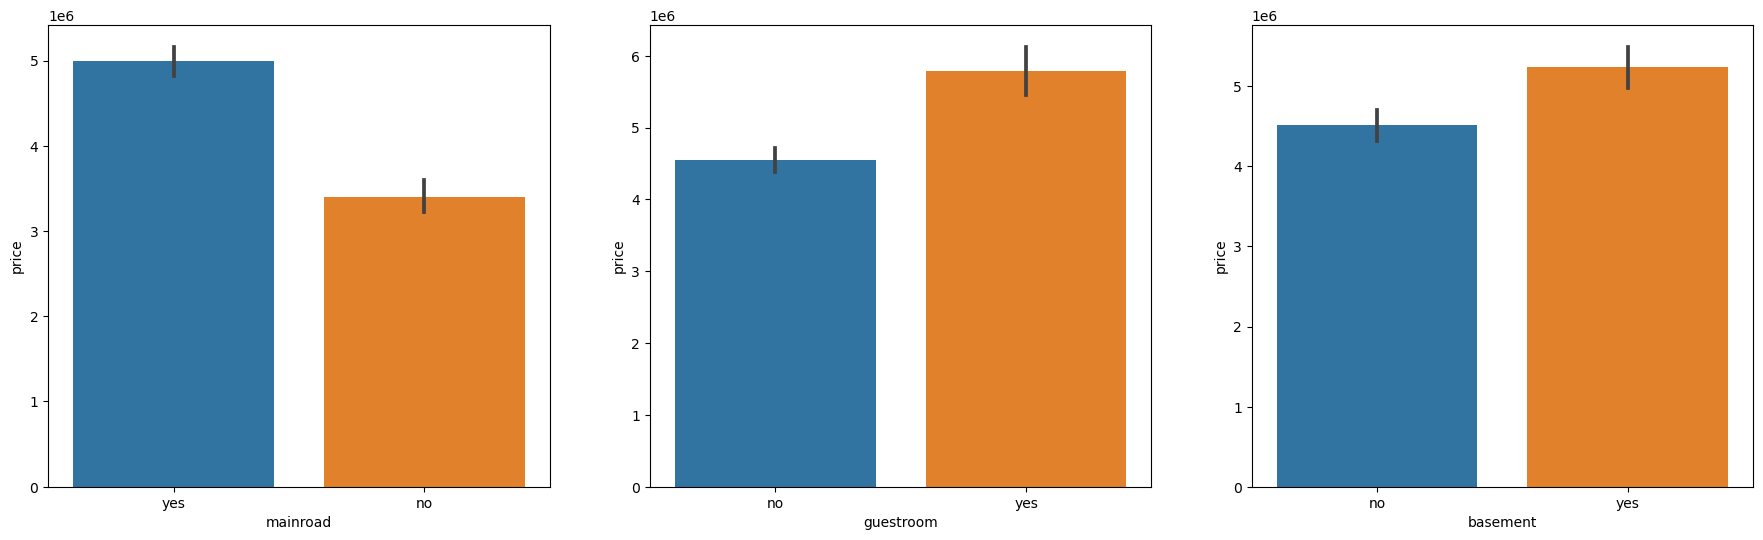

In [29]:
plt.figure(figsize=(22,6))
BVA(data,'mainroad','guestroom','basement')

Price is high if: 1)connected to the mainroad 2)there is a guestroom 3)there is a basement

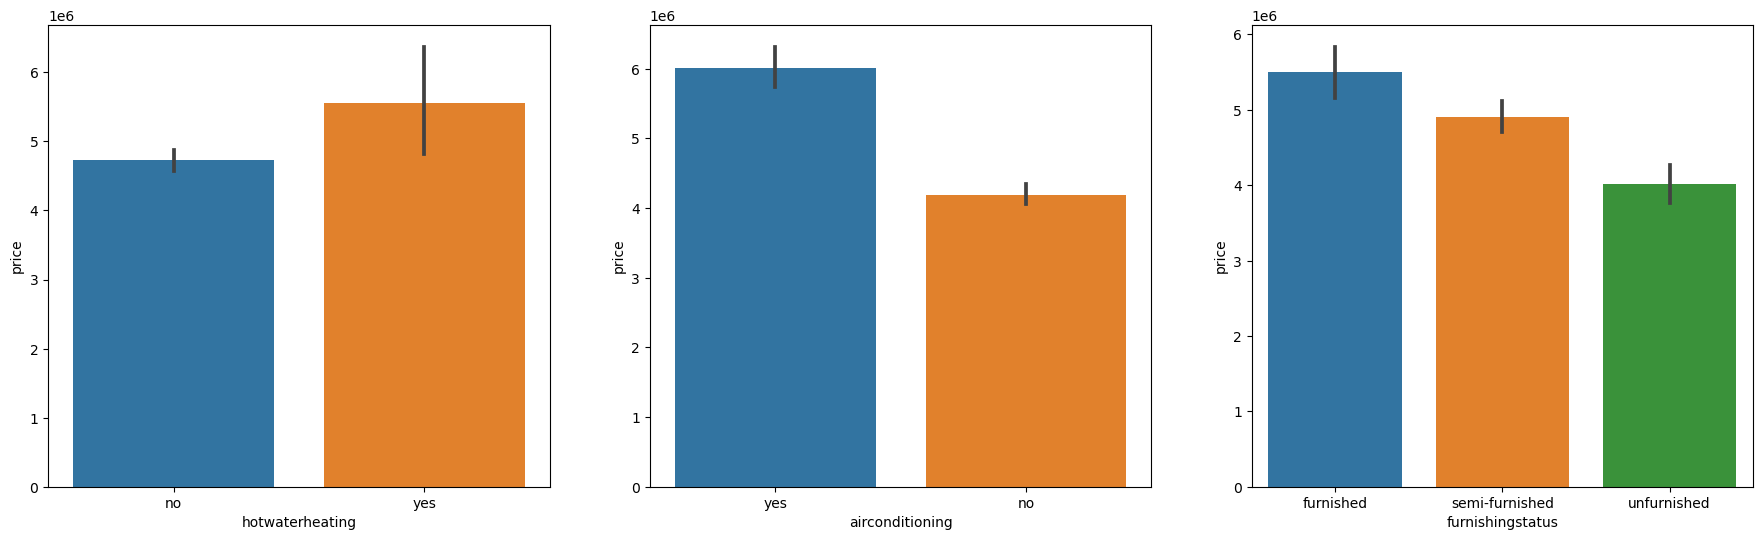

In [32]:
plt.figure(figsize=(22,6))
BVA(data,'hotwaterheating','airconditioning','furnishingstatus')

Price is high if: 1)there is a heater 2)there is an airconditioner 3)the house is furnished

<AxesSubplot:xlabel='parking', ylabel='price'>

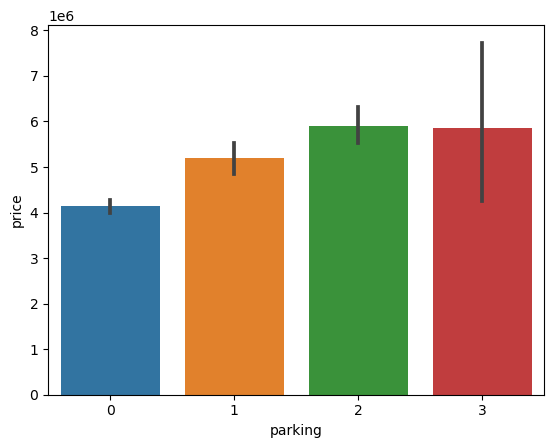

In [33]:
sns.barplot(data=data,x='parking',y='price')

Price is high if there is a parking especially if there are 2 or 3 parkings

<AxesSubplot:xlabel='area', ylabel='price'>

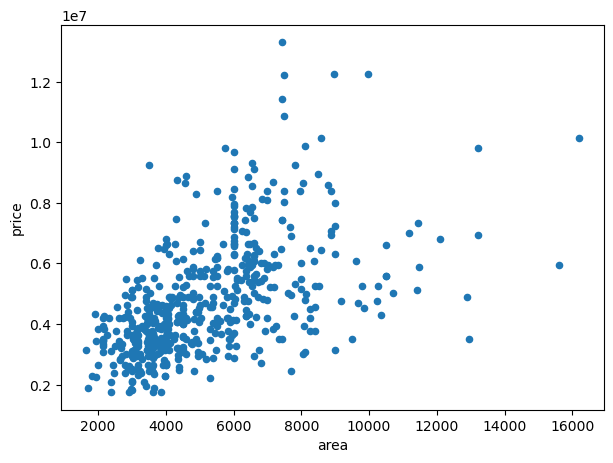

In [39]:
data.plot.scatter(x='area',y='price',marker='o',figsize=(7,5))

Price is high if the house has area around 8000

<AxesSubplot:>

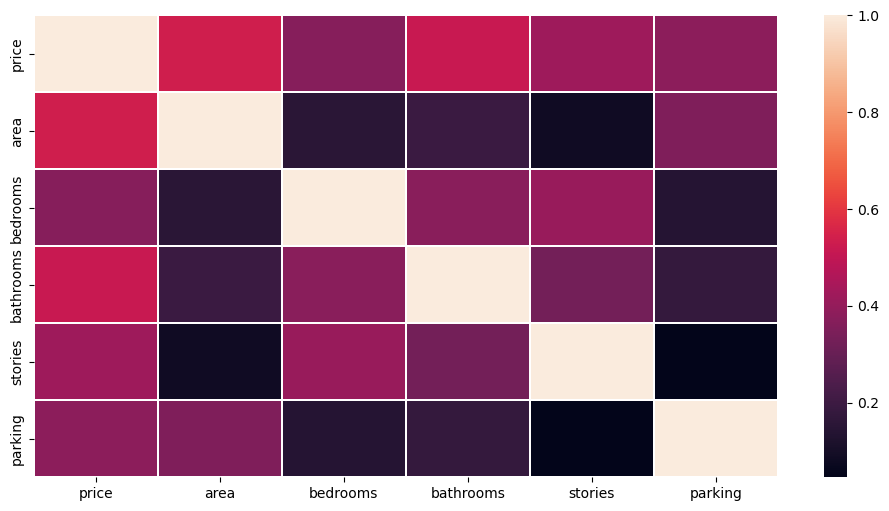

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),linewidths=0.2)

# Multivariate Analysis

In [52]:
def MVA(data,var1,var2,var3):
    sns.boxplot(x=var1,y=var2,hue=var3,data=data,orient='v')

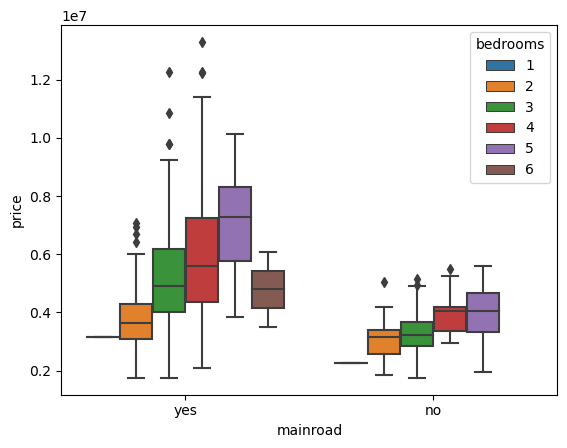

In [53]:
MVA(data,'mainroad','price','bedrooms')

Price is high when the house is connected to mainroad and has 5 bedrooms

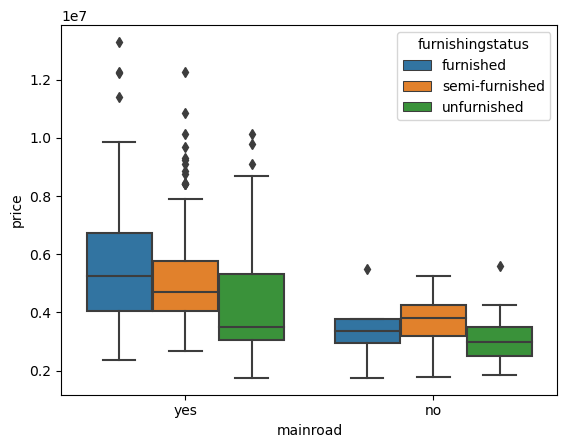

In [82]:
MVA(data,'mainroad','price','furnishingstatus')

Price is high when the house is connected to mainroad and is furnished

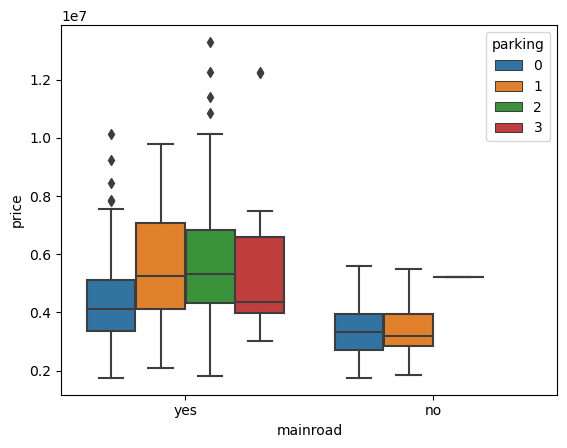

In [68]:
MVA(data,'mainroad','price','parking')

Price is high where the house is both connected to mainroad and has parkings

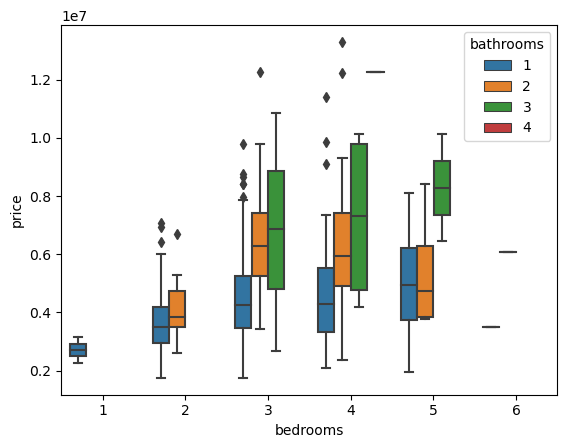

In [69]:
MVA(data,'bedrooms','price','bathrooms')

Price is high with more number of bedrooms and bathrooms

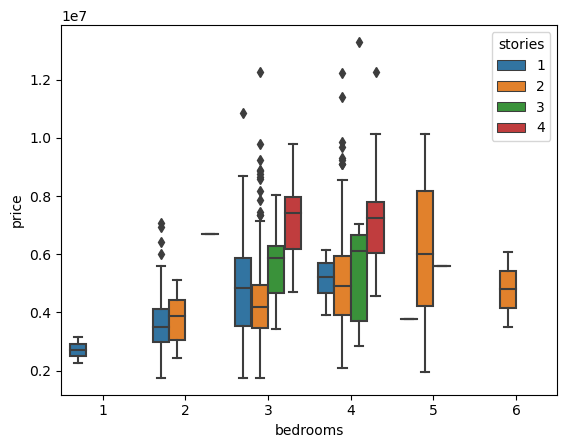

In [70]:
MVA(data,'bedrooms','price','stories')

Price is high with more number of bedrooms and stories

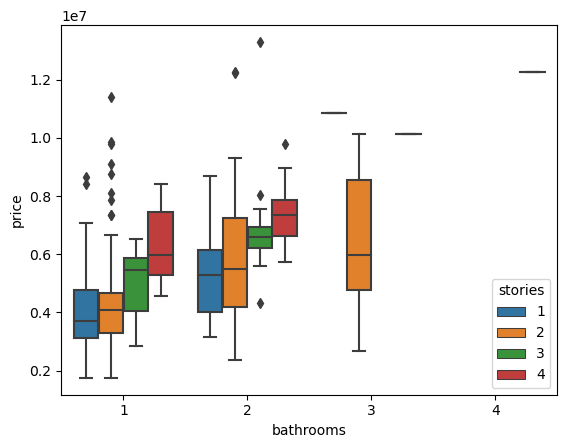

In [71]:
MVA(data,'bathrooms','price','stories')

From the graph it look like 3 bathrooms and 2 stories cost more but few values can't be seen clearly. Either they don't exist or there are very few houses with those combinations

In [72]:
pd.crosstab(data['bathrooms'],data['stories'])

stories,1,2,3,4
bathrooms,,,,
1,197,167,25,12
2,29,63,14,27
3,1,8,0,1
4,0,0,0,1


There is no house for few combinations like 1 story and 4 bathrooms, 2 story and 4 bathrooms, 3 story and 3 bathrooms, 3 story and 4 bathrooms. There is only house for combinations like 1 story and 3 bathrooms, 4 stories and 3 bathrooms, 4 stories and 4 bathrooms

In [74]:
data.pivot_table('price','bathrooms','stories',aggfunc='sum')

stories,1,2,3,4
bathrooms,,,,
1,781917500.0,705271000.0,124726000.0,75057500.0
2,153972000.0,376757500.0,97006000.0,198088940.0
3,10850000.0,51821000.0,NaN,10150000.0
4,NaN,NaN,NaN,12250000.0


from the table the combinations that has only 1 house we can find the price for it, for other houses we cannot say accurately since the table calculates the sum of prices

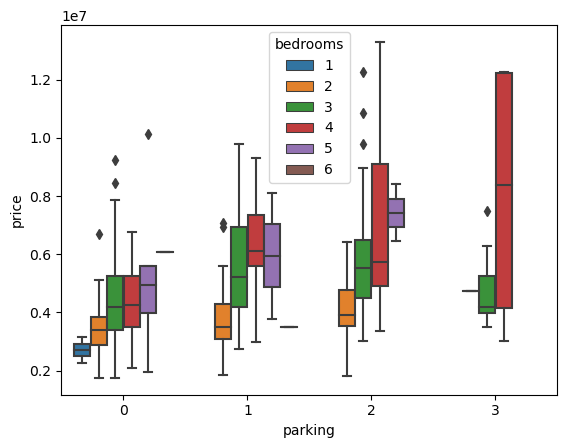

In [54]:
MVA(data,'parking','price','bedrooms')

Price is high when there are 3 parkings and 4 bedrooms

In [57]:
pd.crosstab(data['hotwaterheating'],data['airconditioning'])

airconditioning,no,yes
hotwaterheating,,
no,349,171
yes,24,1


There is only one house with both the facilities

In [67]:
data.pivot_table('price','hotwaterheating','airconditioning',aggfunc='sum')

airconditioning,no,yes
hotwaterheating,,
no,1428234500,1030633940
yes,135359000,3640000


The only house that has both heater and aircondtioner facilities cost 3640000, the other costs given in the table can't be accurate since they are giving sum of price values

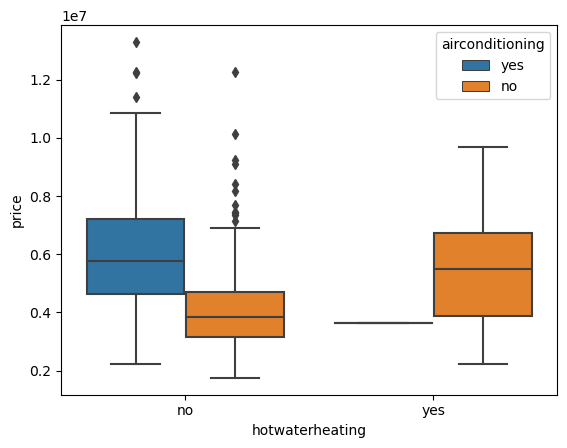

In [56]:
MVA(data,'hotwaterheating','price','airconditioning')

A house where there are no heater and airconditioner facilities cost less compared to house with anyone facility and the cost for the only house with both the facilities is 3640000

<AxesSubplot:xlabel='area', ylabel='price'>

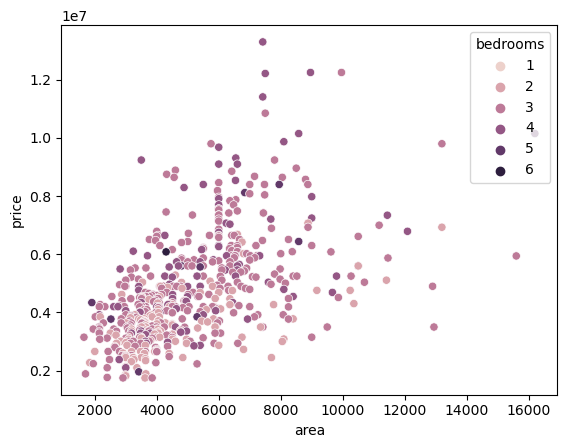

In [78]:
sns.scatterplot(x='area',y='price',hue='bedrooms',data=data)

price is high when both the number of bedrooms and area are large

# Descriptive Statistics

In [79]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Missing Values

In [81]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

There are no missing values in the dataset

# Outliers

Most of the features in the dataset have limited values like number of bedrooms, bathrooms, stories, parkings and the others are categotical variables. The two variables with many values are area and price, so checking for outliers in these two variabes

<AxesSubplot:xlabel='price'>

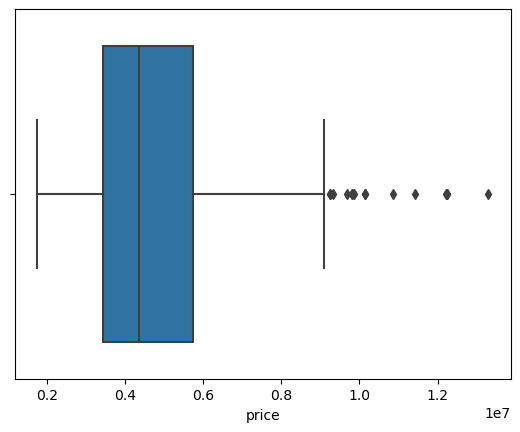

In [83]:
sns.boxplot(data['price'])

In [85]:
# IQR
Q1 = np.percentile(data['price'], 25,interpolation = 'midpoint')

Q3 = np.percentile(data['price'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)


2310000.0


In [86]:
upper = Q3 +1.5*IQR
print(upper)
lower = Q1 -1.5*IQR
print(lower)

9205000.0
-35000.0


values lesser than -35000 and greater than 9205000 are outliers

In [87]:
avg=data['price'].mean()
print(avg)

4766729.247706422


In [89]:
data[data['price']>upper]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished


Maybe the house price is huge because there are a lot of facilities or it could be a error

In [92]:
data_without_outliers=data[(data['price']>lower) & (data['price']<upper)]
data_without_outliers.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,semi-furnished


A separate dataset with no outliers is created

# Encoding of categorical columns

Categorical_data=data.select_dtypes(include='object')
Categorical_data.head()

In [98]:
Encoded_categorical_data=pd.get_dummies(Categorical_data)
Encoded_categorical_data.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0,1,1,0,1,0,1,0,0,1,1,0,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0
2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,0,1,0,1,0,1,1,0,0,1,1,0,0


# Split the data into dependent and independent variables

In [107]:
data=pd.get_dummies(data)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0


In [108]:
x=data.drop(['price'],axis=1) #independent variables
y=data['price'] #dependent variable

# Scale the independent variables

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [110]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Split the data into train and test set

In [111]:
#train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

# Building, training and testing the model

# KNN MODEL

In [112]:
from sklearn.metrics import mean_squared_error as MSE

In [113]:
#implementing KNN
from sklearn.neighbors import KNeighborsRegressor as KNN
reg = KNN(n_neighbors = 5)
# Fitting the model
reg.fit(train_x, train_y)
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
error_MSE = MSE(test_predict, test_y)
error_RMSE=np.sqrt(error_MSE)
print('Test RMSE    ', error_RMSE )

Test RMSE     1363673.7897883453


In [117]:
#Elbow curve for the best value of K
def Elbow(K):
      #initiating empty list
        test_rmse = []
      #training model for evey value of K
        for i in K:
            #Instance of KNN
            reg = KNN(n_neighbors = i)
            reg.fit(train_x, train_y)
            #Appending mse value to empty list claculated using the predictions
            tmp = reg.predict(test_x)
            tmp = MSE(tmp,test_y)
            tmp=np.sqrt(tmp)
            test_rmse.append(tmp)
        return test_rmse

In [118]:
K=range(1,40)

In [119]:
test=Elbow(K)

Text(0.5, 1.0, 'Elbow Curve')

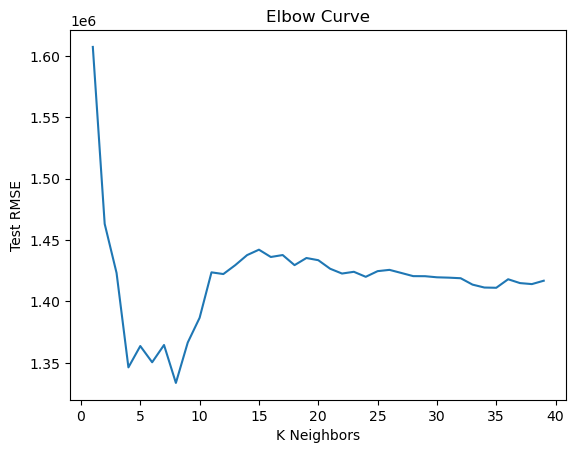

In [120]:
plt.plot(K,test)
plt.xlabel("K Neighbors")
plt.ylabel("Test RMSE")
plt.title("Elbow Curve")

(5.0, 10.0)

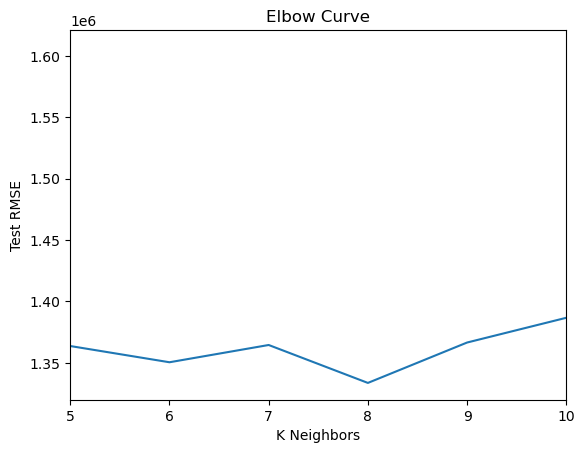

In [121]:
plt.plot(K,test)
plt.xlabel("K Neighbors")
plt.ylabel("Test RMSE")
plt.title("Elbow Curve")
plt.xlim(5,10)

RMSE is least with k=8

In [122]:
reg = KNN(n_neighbors = 35)
# Fitting the model
reg.fit(train_x, train_y)
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
error_MSE = MSE(test_predict, test_y)
error_RMSE=np.sqrt(error_MSE)
print('Test RMSE    ', error_RMSE )

Test RMSE     1411145.1756150103


# Measuring the model using various metrics

In [125]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE

In [127]:
print('Mean Absolute Error:', MAE(test_predict,test_y))
print('Mean Squared Error:', MSE(test_predict,test_y))
print('Root Mean Squared Error:', np.sqrt(MSE(test_predict,test_y)))
print('Root Mean Squared Log Error:',np.sqrt(MSLE(test_predict,test_y)))

Mean Absolute Error: 967917.0948905109
Mean Squared Error: 1991330706661.5183
Root Mean Squared Error: 1411145.1756150103
Root Mean Squared Log Error: 0.2635227127738086
